# Types of Machine Learning Algo
* Supervised Machine Learning --> X & Y
    * Regression - Contnuous or Quantitative
    * Classification
* Un-Supervised Machine Learning --> No Y only Xs

# Exploratory Data Analysis
EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like: 

Main features of data variables and relationships that hold between them Identifying which variables are important for our problem 
We shall look at various exploratory data analysis methods like: 

* Analyzing the data
* Checking for the duplicates
* Missing Values Calculation
* Exploratory Data Analysis
* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis

In [34]:
# importting Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as wr 
import scipy.stats
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import f_oneway
wr.filterwarnings('ignore') 

# Reading Data
df = pd.read_csv('Classification/mushroom_cleaned.csv')

In [39]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [16]:
# Analysing Data
print(df.shape)
print(df.info())

(54035, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB
None


In [17]:
print(df.describe())

       cap-diameter     cap-shape  gill-attachment    gill-color  \
count  54035.000000  54035.000000     54035.000000  54035.000000   
mean     567.257204      4.000315         2.142056      7.329509   
std      359.883763      2.160505         2.228821      3.200266   
min        0.000000      0.000000         0.000000      0.000000   
25%      289.000000      2.000000         0.000000      5.000000   
50%      525.000000      5.000000         1.000000      8.000000   
75%      781.000000      6.000000         4.000000     10.000000   
max     1891.000000      6.000000         6.000000     11.000000   

        stem-height    stem-width    stem-color        season         class  
count  54035.000000  54035.000000  54035.000000  54035.000000  54035.000000  
mean       0.759110   1051.081299      8.418062      0.952163      0.549181  
std        0.650969    782.056076      3.262078      0.305594      0.497580  
min        0.000426      0.000000      0.000000      0.027372      0.000000

In [18]:
# check for missing values: 
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [19]:
#checking duplicate values 
df.nunique()

cap-diameter       1847
cap-shape             7
gill-attachment       7
gill-color           12
stem-height        1455
stem-width         3510
stem-color           13
season                4
class                 2
dtype: int64

# Univariate Analysis
In Univariate analysis, plotting the right charts can help us better understand the data, which is why data visualization is so important. Matplotlib and Seaborn libraries are used in this post to visualize our data.

When examining the distribution of a single variable, it is important to distinguish on type of variable i.e. between a categorical variable and a quantitative variable. Variables are visualized and summarized differently
based on type of variable

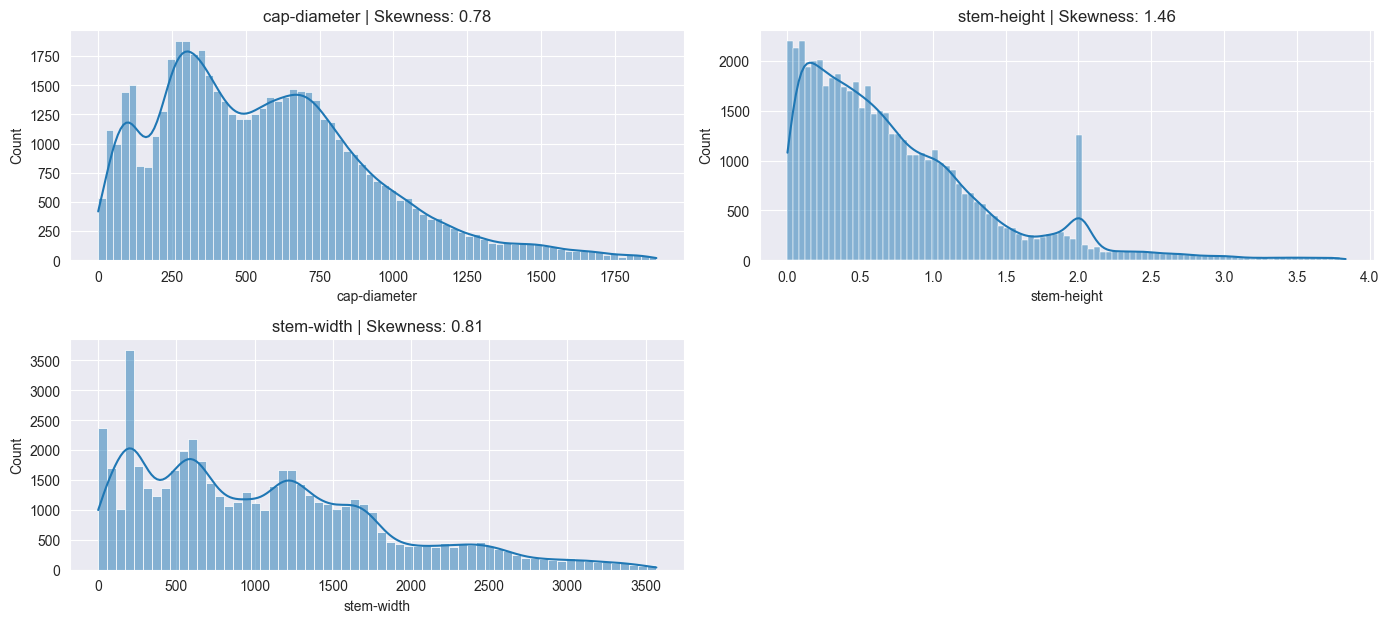

In [44]:
# Set Seaborn style 
sns.set_style("darkgrid") 

# Identify numerical columns 
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Plot distribution of each numerical feature 
plt.figure(figsize=(14, len(numerical_columns) * 3)) 
for idx, feature in enumerate(numerical_columns, 1): 
	plt.subplot(len(numerical_columns), 2, idx) 
	sns.histplot(df[feature], kde=True) 
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}") 

# Adjust layout and show plots
plt.tight_layout() 
plt.show()

<Figure size 1400x1800 with 0 Axes>

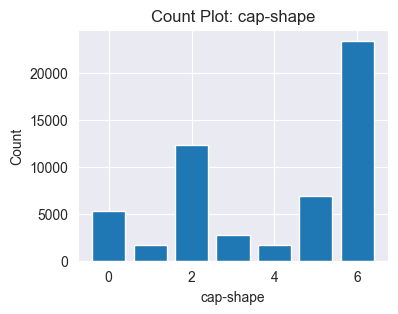

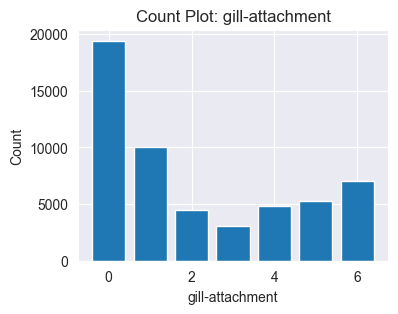

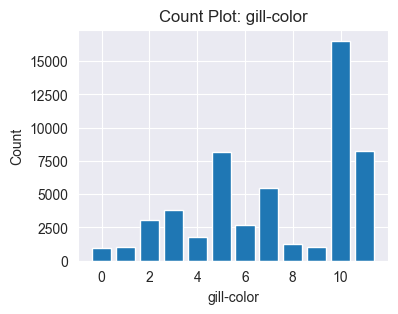

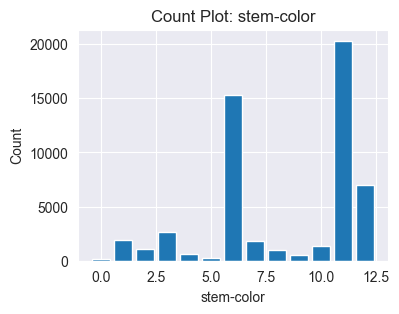

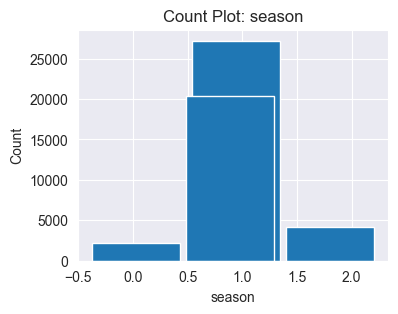

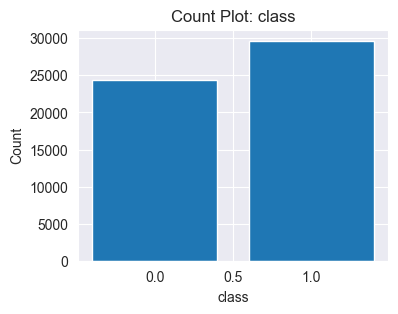

<Figure size 640x480 with 0 Axes>

In [61]:
# Identify Categorical columns 
cat_columns = ['cap-shape','gill-attachment','gill-color','stem-color','season','class']

# Plot distribution of each numerical feature 
plt.figure(figsize=(14, len(cat_columns) * 3)) 
for idx, feature in enumerate(cat_columns, 1): 
	# Using Matplotlib to create a count plot
    quality_counts = df[feature].value_counts() 
    plt.figure(figsize=(4, 3)) 
    plt.bar(quality_counts.index, quality_counts) 
    plt.title('Count Plot: '+ feature) 
    plt.xlabel(feature) 
    plt.ylabel('Count') 
    plt.show()

# Adjust layout and show plots 
plt.tight_layout() 
plt.show() 

# BiVariate Analysis
When examining the relationship between two variables, the first step is to classify the two relevant variables according to their role and type and only then to determine the appropriate tools for summarizing the data.

* C -> Q ---- Exploring the relationship amounts to comparing the distributions of the quantitative response variable for each category of the explanatory variable. To do this, we use:
    * Display: side-by-side boxplots<n>
    * Hypothesis Test:
        * t-Test (independnt Categories)
        * ANNOVA
* C -> C ---- Exploring the relationship amounts to comparing the distributions of the categorical response variable, for each category of the explanatory variable. To do this, we use:
    * Display: two-way table
    * Hypothesis Test: Chi-Square Test
* Q -> Q ---- Examine the relationship using:
    * Display: two-way table
    * Hypothesis Test: t-Test for slope
 
### p-Value < 0.05 or 5% - Select variable
### p-Value > 0.05 or 5% - Remove variable

In [39]:
ct_table_ind=pd.crosstab(df['class'],columns = df['cap-shape'])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 cap-shape     0    1     2     3    4     5      6
class                                             
0          1258  774  5918   324  894  3117  12075
1          4015  948  6376  2456  806  3772  11302


In [56]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
# Interpreting the result
significant = p < 0.05  # 5% significance level

print(f"chi2 statistic:     {chi2_stat}")
print(f"p-value:            {p}")
print(f"degrees of freedom: {dof}")
print("Significant?:\n",significant)

chi2 statistic:     2706.980559898887
p-value:            0.0
degrees of freedom: 6
Significant?:
 True


In [60]:
# Identify Categorical columns 
cat_columns = ['cap-shape','gill-attachment','gill-color','stem-color','season','class']

for c in cat_columns:
    ct_table_ind=pd.crosstab(df['class'],columns = df['cap-shape'])
    chi2, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
    # Interpreting the result
    significant = p < 0.05  # 5% significance level
    print('Column: '+c+' Significant? -->'+str(significant))


Column: cap-shape Significant? -->True
Column: gill-attachment Significant? -->True
Column: gill-color Significant? -->True
Column: stem-color Significant? -->True
Column: season Significant? -->True
Column: class Significant? -->True


In [36]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=df['class'], b=df['cap-diameter'], equal_var=True)

TtestResult(statistic=-366.0448241375461, pvalue=0.0, df=108068.0)

In [35]:
# Conduct the one-way ANOVA
f_oneway(df['class'], df['cap-diameter'])

F_onewayResult(statistic=133988.81327788715, pvalue=0.0)

# Multi-Variate Analysis

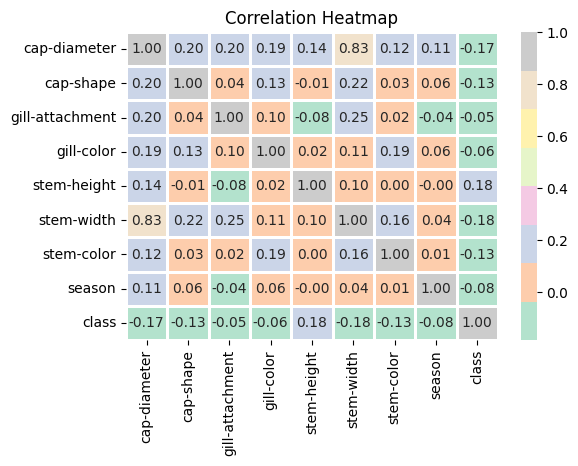

In [42]:
# Assuming 'df' is your DataFrame 
plt.figure(figsize=(6, 4)) 

# Using Seaborn to create a heatmap 
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2) 

plt.title('Correlation Heatmap') 
plt.show() 


For interpreting a correlation matrix plot,

* Values close to +1 indicates strong positive correlation, -1 indicates a strong negative correlation and 0 indicates suggests no linear correlation.
* Darker colors signify strong correlation, while light colors represents weaker correlations.
* Positive correlation variable move in same directions. As one increases, the other also increases.
* Negative correlation variable move in opposite directions. An increase in one variable is associated with a decrease in the other.

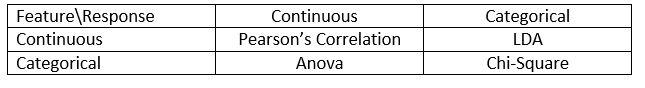